PHYS 105: Computational Physics I
In-Class Exercise 8.0
2D Motion of a Projectile
Start with the general two-dimensional predictor--corrector scheme introduced previously. Consider a projectile launched with speed  𝑣0
v
0
  at an angle of  𝜃0
θ
0
  to the horizontal. Take gravity to be uniform,
   𝑎𝑥𝑎𝑦==0−𝑔  =  −9.80 m/s2,
   
a
x
=	0	
a
y
=	−g  =  
−
9.80
 
m
/
s
2
, 
 
and use a timestep of  𝛿𝑡=0.1
δ
t
=
0.1
  s.
Instructions:
For  𝑣0
v
0
  = 100 m/s and angle  𝜃0=60∘
θ
0
=
60
∘
 
Plot the trajectory of your projectile until it strikes the ground, at  𝑦
y
  = 0.
Determine the range, maximum height, and time of flight. As usual, use linear interpolation (to  𝑦
y
  = 0) to refine your answer for the range and time of flight. Compare your results to the "Physics I" analytic result.
Repeat for  𝑣0
v
0
  = 1500 m/s and angle  𝜃0=20∘
θ
0
=
20
∘
 

The height of flight: 17.17546m at position: 12.85559m

The range of flight numerically: 18.71650m
The range of flight anayltically: -74.29325m

The time of flight numerically: 3.80210s
The time of flight analytically: -1.48587s


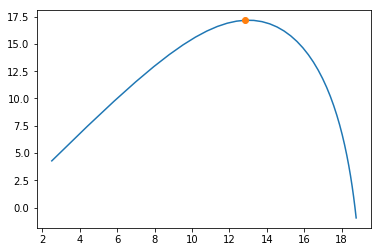

In [2]:
import math
import matplotlib.pyplot as plt

# acceleration due to gravity
g = 9.8
alpha = 0
beta = .1

x_pos = []
y_pos = []

x_pos_analytic = []
y_pos_analytic = []

height = []
pos_height = []
time = []

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

def acc(x, y, vx, vy, t):
    global alpha, beta
    v_abs = math.sqrt(vx**2 + vy**2)
    return -alpha*vx - beta*v_abs*vx, -g - alpha*vy - beta*v_abs*vy

def take_a_step(x, y, vx, vy, t, dt):

    ax,ay = acc(x, y, vx, vy, t)
    
    # Predict: 
    x  += vx*dt + 0.5*ax*dt*dt
    y  += vy*dt + 0.5*ay*dt*dt
    vx += ax*dt
    vy += ay*dt

    # Correct: 
    ax1,ay1 = acc(x, y, vx, vy, t)

    vx += 0.5*(ax1-ax)*dt
    vy += 0.5*(ay1-ay)*dt

    t += dt

    return x,y,vx,vy,t

def analytic(t):
    x = x0 + vx0*t
    y = y0 + vy0*t - .5*g*t**2
    return x, y
    
def check_amplitude(yp, y, yf, x):
        if (yp < y) and (yf <= y):
            height.append(y)
            pos_height.append(x)


# Set initial position and velocity.

x0 = 0.0
y0 = 0.0

v0    = 100				# unit: m/s 
theta = 60.0				# (degrees) , angle with horizontal 

# Determine components of the initial velocity vector.
vx0 = v0 * math.cos( math.radians(theta) )
vy0 = v0 * math.sin( math.radians(theta) )

# Set parameters governing the numerical details.
dt    = 0.1
t_max = 15.0

# Initialize the trajectory.
t = 0.0

x = x0
xp = x

y = y0
yp = y

vx = vx0
vy = vy0

# Calculate the trajectory to time t_max, using the 2D
# predictor-corrector scheme.

while y>=0:
    xp, yp = x, y
    x,y,vx,vy,t = take_a_step(x, y, vx, vy, t, dt)
    xf, yf = take_a_step(x, y, vx, vy, t, dt)[0:2]
    x_ana, y_ana = analytic(t)
    
    check_amplitude(yp, y, yf, x)
    
    x_pos.append(x)
    y_pos.append(y)
    x_pos_analytic.append(x_ana)
    y_pos_analytic.append(y_ana)
    
    time.append(t)
    
plt.plot(x_pos, y_pos)
plt.plot(pos_height, height, 'o')

range_of_flight = interp(x_pos[-2], y_pos[-2], x_pos[-1], y_pos[-1], y = 0)
range_of_flight_analytic = interp(x_pos_analytic[-2], y_pos_analytic[-2], x_pos_analytic[-1], y_pos_analytic[-1], y = 0)
time_of_flight  = interp(time[-2], y_pos[-2], time[-1], y_pos[-1], y=0)
time_of_flight_analytic = interp(time[-2], y_pos_analytic[-2], time[-1], y_pos_analytic[-1], y=0)

print('The height of flight: {:.5f}m at position: {:.5f}m'.format(height[-1], pos_height[-1]))

print('\nThe range of flight numerically: {:.5f}m'.format(range_of_flight))
print('The range of flight anayltically: {:.5f}m'.format(range_of_flight_analytic))

print('\nThe time of flight numerically: {:.5f}s'.format(time_of_flight))
print('The time of flight analytically: {:.5f}s'.format(time_of_flight_analytic))



   